In [17]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
import tensorflow as tf

In [19]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

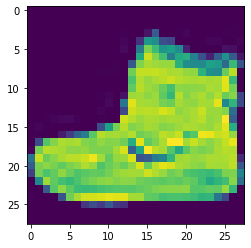

In [23]:
plt.imshow(X_train[0])

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
X_train.max()

255

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [28]:
X_train[0].shape

(28, 28, 1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.5321 - accuracy: 0.8112 - val_loss: 0.3473 - val_accuracy: 0.8757
Epoch 2/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.3552 - accuracy: 0.8732 - val_loss: 0.2951 - val_accuracy: 0.8952
Epoch 3/10
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.3030 - accuracy: 0.8913 - val_loss: 0.2710 - val_accuracy: 0.9017
Epoch 4/10
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.2713 - accuracy: 0.9022 - val_loss: 0.2465 - val_accuracy: 0.9082
Epoch 5/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.2462 - accuracy: 0.9103 - val_loss: 0.2302 - val_accuracy: 0.9170
Epoch 6/10
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.2298 - accuracy: 0.9178 - val_loss: 0.2279 - val_accuracy: 0.9174
Epoch 7/10
60000/60000 [==========================

In [33]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.21968209781646728, 0.9222]

In [0]:
model.save('fashion_mnist_cnn.h5')